In [52]:
import pandas as pd

In [53]:
dataset=pd.read_csv(r"C:\Users\wwrao\Downloads\kmeans_4D_dataset.csv")

In [54]:
dataset.head(2)

,Feature_1,Feature_2,Feature_3,Feature_4,Cluster_Label
0,5.223735,-5.381433,-5.602968,-5.835351,3
1,6.630481,-5.058068,-6.220004,-7.499593,3


In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(dataset.iloc[:, :-1])  # Exclude cluster labels
pca_data

array([[ -7.05919044,  -9.50105367],
       [ -7.64537259, -11.33193256],
       [ 14.36288037,  -3.67738661],
       [ -7.35163856,  -9.89056104],
       [ 11.39281882,  -2.88965959],
       [ 12.95152833,  -0.69128141],
       [ -6.43099561,  -9.52112726],
       [ 12.41982414,  -0.78494979],
       [ -6.86571571,   7.07529381],
       [ -8.35816129, -10.34515783],
       [ -5.8798746 ,  10.25044699],
       [ -5.72502472,  11.27788117],
       [ -4.47298394,   7.90516156],
       [ -5.25717056,   8.66275172],
       [  2.31780953,   6.19430247],
       [ -5.01685109,   8.10071265],
       [  3.01602445,   7.20359635],
       [ -4.10998316,   7.38222972],
       [ -7.29333129, -10.62557558],
       [ -3.41498168,   8.13272896],
       [ -7.28004071,   6.94863501],
       [ -6.86205829,   6.18356702],
       [ -9.16060649,  -7.39291172],
       [ -6.20418895,   5.52109927],
       [ 11.90744811,  -5.43407298],
       [  9.86187612,  -2.5186205 ],
       [ -6.34130913,   7.41969068],
 

In [57]:
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
df_pca["Cluster_Label"] = dataset["Cluster_Label"]
df_pca.head(5)

,PC1,PC2,Cluster_Label
0,-7.059190,-9.501054,3
1,-7.645373,-11.331933,3
2,14.362880,-3.677387,0
3,-7.351639,-9.890561,3
4,11.392819,-2.889660,0


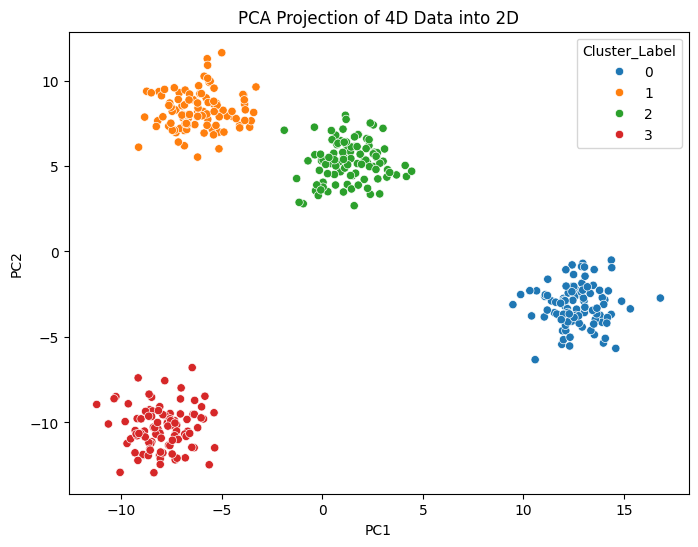

In [58]:
# 2D Scatter plot using PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster_Label", palette="tab10", data=df_pca)
plt.title("PCA Projection of 4D Data into 2D")
plt.show()

In [73]:
x=dataset.iloc[:,:-1]
x


,Feature_1,Feature_2,Feature_3,Feature_4
0,5.223735,-5.381433,-5.602968,-5.835351
1,6.630481,-5.058068,-6.220004,-7.499593
2,-2.702740,9.499147,6.903302,2.182663
3,4.710695,-4.355531,-7.245011,-7.304213
4,-1.368689,8.322002,3.561781,2.563473
...,...,...,...,...
395,-1.113401,9.026566,3.462068,2.527694
396,6.918474,-4.634109,-8.065540,-8.444880
397,-2.436921,11.970177,4.409046,2.335026
398,1.814614,4.180146,-10.903840,7.670136


In [74]:
y=dataset.iloc[:,-1]

In [75]:
from sklearn.cluster import KMeans

In [76]:
wcss=[]
for i in range(1,10):
    kmean=KMeans()
    
    kmean.fit_predict(x)
    wcss.append(kmean.inertia_)

In [77]:
wcss

[1852.8174921605182,
 1832.795064811974,
 1856.1945749596548,
 1803.0206086425771,
 1821.9388540974796,
 1882.3827095946467,
 1807.9479533661124,
 1888.9107000909771,
 1803.3770554107507]

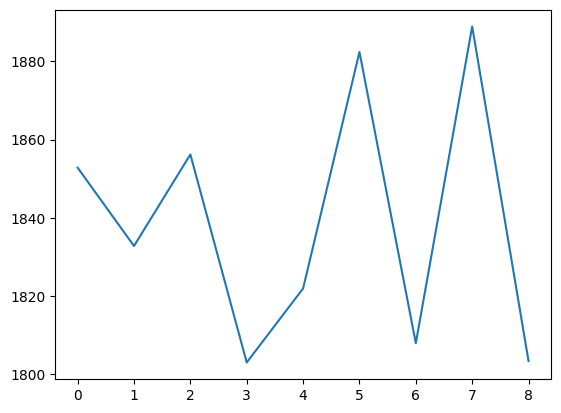

In [78]:
plt.plot(wcss)

In [80]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Fit K-Means for different values of k
for k in [3, 4, 5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x)  # Replace 'dataset' with your actual data
    score = silhouette_score(x, labels)
    print(f"Silhouette Score for k = {k}: {score}")


Silhouette Score for k = 3: 0.6728442872704121
Silhouette Score for k = 4: 0.8062434361505573
Silhouette Score for k = 5: 0.6489965080108768
Silhouette Score for k = 6: 0.5018030013371902
Silhouette Score for k = 7: 0.3452966238653232
Silhouette Score for k = 8: 0.20461793095104533


In [106]:
k=KMeans(n_clusters=4)

In [107]:
y_means=k.fit_predict(x)
y_means

array([2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 3, 0, 3, 0, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 3, 1, 3, 3, 0, 2, 2, 1, 3, 1, 1, 3, 0, 1, 3, 2, 3,
       3, 1, 0, 2, 0, 1, 1, 1, 1, 3, 0, 2, 2, 1, 0, 3, 3, 1, 2, 0, 2, 1,
       3, 0, 1, 1, 3, 0, 2, 2, 3, 3, 0, 0, 2, 2, 1, 3, 2, 2, 0, 0, 2, 1,
       2, 3, 2, 0, 3, 3, 1, 3, 2, 1, 3, 3, 1, 0, 2, 2, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 3, 3, 3, 0, 1, 1, 1, 3, 2, 0, 0, 2, 2, 1, 0, 2, 3, 0, 2,
       1, 0, 2, 3, 1, 0, 2, 2, 0, 2, 0, 3, 2, 3, 3, 1, 2, 0, 3, 2, 1, 2,
       3, 1, 3, 2, 3, 0, 1, 3, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1,
       1, 0, 1, 2, 1, 3, 2, 2, 3, 3, 1, 2, 0, 0, 3, 0, 1, 3, 0, 0, 1, 2,
       1, 2, 2, 3, 0, 1, 3, 3, 2, 1, 2, 0, 1, 1, 2, 3, 3, 2, 1, 0, 0, 0,
       2, 0, 3, 0, 0, 2, 1, 2, 3, 1, 0, 3, 1, 2, 1, 0, 2, 0, 0, 1, 3, 3,
       3, 2, 2, 1, 1, 0, 2, 0, 1, 3, 1, 1, 0, 1, 2, 1, 3, 1, 1, 1, 3, 3,
       2, 3, 0, 2, 3, 3, 1, 0, 0, 2, 2, 3, 0, 1, 1, 0, 2, 2, 1, 0, 0, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 3, 0, 2, 2, 1,

In [109]:
# Compute ARI Score
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y, y_means)
print("Adjusted Rand Index (ARI):", ari_score)

Adjusted Rand Index (ARI): 1.0
